🔹 1. Distribución de Nacionalidades de los Pilotos
📌 Objetivo: Crear un gráfico de barras con el número de pilotos por nacionalidad.
🔹 Librerías: pandas, matplotlib, seaborn
🔹 Tipo de gráfico: Barras

In [37]:
import pandas as pd   # Para cargar y manipular los datasets
import numpy as np    # Para operaciones numéricas


In [38]:
import matplotlib.pyplot as plt   # Para gráficos básicos
import seaborn as sns             # Para gráficos más avanzados y estéticos


In [39]:
drivers = pd.read_csv("drivers.csv", index_col=None)
fastest_laps = pd.read_csv("fastest_laps_.csv")
teams = pd.read_csv("teams.csv")
winners = pd.read_csv("winners.csv")
drivers_24 = pd.read_csv("drivers_2024_final.csv")
fastest_laps_24 = pd.read_csv("fastest_laps_2024.csv")
teams_24 = pd.read_csv("teams_2024_fixed.csv")

In [40]:
drivers_completed = pd.concat([drivers, drivers_24])

In [41]:
drivers_completed.head()

,Pos,Driver,Nationality,Car,PTS,year,Code,Position,Team,Points,Year
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950.0,FAR,NaN,NaN,NaN,NaN
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950.0,FAN,NaN,NaN,NaN,NaN
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950.0,FAG,NaN,NaN,NaN,NaN
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950.0,ROS,NaN,NaN,NaN,NaN
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950.0,ASC,NaN,NaN,NaN,NaN


In [42]:
fastest_laps_completed = pd.concat([fastest_laps, fastest_laps_24])

In [43]:
drivers_completed.dtypes

Pos             object
Driver          object
Nationality     object
Car             object
PTS            float64
year           float64
Code            object
Position       float64
Team            object
Points         float64
Year           float64
dtype: object

In [44]:


def drivers_correction(drivers):
    # Convertir "NaN" string a valores NaN reales
    drivers.replace("NaN", pd.NA, inplace=True)
    drivers.replace("Nan", pd.NA, inplace=True)  # En caso de inconsistencia con "Nan"

    # Rellenar valores NaN con los datos de respaldo
    drivers["Pos"].fillna(drivers["Position"], inplace=True)
    drivers["Car"].fillna(drivers["Team"], inplace=True)
    
    # Convertir columnas numéricas correctamente
    drivers["PTS"].fillna(drivers["Points"], inplace= True)
    drivers["year"].fillna(drivers["Year"], inplace = True)
    
    return drivers


In [45]:
drivers_correction(drivers_completed)


,Pos,Driver,Nationality,Car,PTS,year,Code,Position,Team,Points,Year
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950.0,FAR,NaN,NaN,NaN,NaN
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950.0,FAN,NaN,NaN,NaN,NaN
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950.0,FAG,NaN,NaN,NaN,NaN
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950.0,ROS,NaN,NaN,NaN,NaN
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950.0,ASC,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18,19.0,Logan Sargeant,USA,Williams,19.0,2024.0,SAR,19.0,Williams,19.0,2024.0
19,20.0,Daniel Ricciardo,AUS,AlphaTauri,12.0,2024.0,RIC,20.0,AlphaTauri,12.0,2024.0
20,21.0,Oliver Bearman,GBR,Ferrari/Haas,8.0,2024.0,BEA,21.0,Ferrari/Haas,8.0,2024.0
21,22.0,Jack Doohan,AUS,Alpine,0.0,2024.0,DOO,22.0,Alpine,0.0,2024.0


In [46]:
drivers_completed.drop(["Position", "Team", "Points", "Year"], axis=1, inplace= True)

In [47]:
drivers_completed

,Pos,Driver,Nationality,Car,PTS,year,Code
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950.0,FAR
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950.0,FAN
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950.0,FAG
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950.0,ROS
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950.0,ASC
...,...,...,...,...,...,...,...
18,19.0,Logan Sargeant,USA,Williams,19.0,2024.0,SAR
19,20.0,Daniel Ricciardo,AUS,AlphaTauri,12.0,2024.0,RIC
20,21.0,Oliver Bearman,GBR,Ferrari/Haas,8.0,2024.0,BEA
21,22.0,Jack Doohan,AUS,Alpine,0.0,2024.0,DOO


In [48]:
fastest_laps_completed.tail()

,Grand Prix,Driver,Car,Time,year,Code,Year
1108,Japón,Max Verstappen,Red Bull Racing,1:33.706,NaN,VER,2024.0
1109,China,Fernando Alonso,Aston Martin,1:37.810,NaN,ALO,2024.0
1110,Emilia-Romaña,George Russell,Mercedes,1:18.589,NaN,RUS,2024.0
1111,Mónaco,Lewis Hamilton,Mercedes,1:14.165,NaN,HAM,2024.0
1112,Canadá,Lewis Hamilton,Mercedes,1:14.856,NaN,HAM,2024.0


In [49]:
def laps_correction(fastest_laps):
    # Convertir "NaN" string a valores NaN reales
    fastest_laps.replace("NaN", pd.NA, inplace=True)
    fastest_laps.replace("Nan", pd.NA, inplace=True)  # En caso de inconsistencia con "Nan"

    # Rellenar valores NaN con los datos de respaldo
    fastest_laps["year"].fillna(fastest_laps["Year"], inplace=True)

    
    return fastest_laps

In [50]:
laps_correction(fastest_laps_completed)

,Grand Prix,Driver,Car,Time,year,Code,Year
0,Great Britain,Nino Farina,Alfa Romeo,1:50.600,1950.0,FAR,NaN
1,Monaco,Juan Manuel Fangio,Alfa Romeo,1:51.000,1950.0,FAN,NaN
2,Indianapolis 500,Johnnie Parsons,Kurtis Kraft Offenhauser,NaN,1950.0,PAR,NaN
3,Switzerland,Nino Farina,Alfa Romeo,2:41.600,1950.0,FAR,NaN
4,Belgium,Nino Farina,Alfa Romeo,4:34.100,1950.0,FAR,NaN
...,...,...,...,...,...,...,...
1108,Japón,Max Verstappen,Red Bull Racing,1:33.706,2024.0,VER,2024.0
1109,China,Fernando Alonso,Aston Martin,1:37.810,2024.0,ALO,2024.0
1110,Emilia-Romaña,George Russell,Mercedes,1:18.589,2024.0,RUS,2024.0
1111,Mónaco,Lewis Hamilton,Mercedes,1:14.165,2024.0,HAM,2024.0


In [51]:
fastest_laps_completed.drop(["Year"], axis=1, inplace = True)

In [52]:
teams_completed = pd.concat([teams, teams_24])

In [53]:
teams_completed.tail()

,Pos,Team,PTS,year,Points,Year
700,6,Alpine,NaN,NaN,65.0,2024.0
701,7,Haas,NaN,NaN,58.0,2024.0
702,8,RB (Racing Bulls),NaN,NaN,42.0,2024.0
703,9,Williams,NaN,NaN,17.0,2024.0
704,10,Sauber,NaN,NaN,4.0,2024.0


In [54]:
def teams_correction(teams):
    # Convertir "NaN" string a valores NaN reales
    teams.replace("NaN", pd.NA, inplace=True)
    teams.replace("Nan", pd.NA, inplace=True)  # En caso de inconsistencia con "Nan"

    # Rellenar valores NaN con los datos de respaldo
    teams["year"].fillna(teams["Year"], inplace=True)
    teams["PTS"].fillna(teams["Points"], inplace= True)

    
    return teams

In [55]:
teams_correction(teams_completed)

,Pos,Team,PTS,year,Points,Year
0,1,Vanwall,48.0,1958.0,NaN,NaN
1,2,Ferrari,40.0,1958.0,NaN,NaN
2,3,Cooper Climax,31.0,1958.0,NaN,NaN
3,4,BRM,18.0,1958.0,NaN,NaN
4,5,Maserati,6.0,1958.0,NaN,NaN
...,...,...,...,...,...,...
700,6,Alpine,65.0,2024.0,65.0,2024.0
701,7,Haas,58.0,2024.0,58.0,2024.0
702,8,RB (Racing Bulls),42.0,2024.0,42.0,2024.0
703,9,Williams,17.0,2024.0,17.0,2024.0


In [56]:
teams_completed.drop(["Year"], axis= 1, inplace= True)

In [57]:
drivers_completed['Car'].unique()

array(['Alfa Romeo', 'Talbot-Lago', 'Ferrari', 'Kurtis Kraft Offenhauser',
       'Deidt Offenhauser', 'Maserati', 'Simca-Gordini', nan,
       'Maserati Milano', 'BRM', 'Sherman Offenhauser',
       'Schroeder Offenhauser', 'Cooper Bristol', 'Gordini',
       'Kuzma Offenhauser', 'Lesovsky Offenhauser',
       'Connaught Lea Francis', 'Mercedes-Benz', 'Lancia',
       'Watson Offenhauser', 'Connaught Alta', 'Phillips Offenhauser',
       'Vanwall', 'Kurtis Kraft Novi', 'Epperly Offenhauser',
       'Cooper Climax', 'Lotus Climax', 'Cooper Maserati',
       'Cooper Castellotti', 'Trevis Offenhauser', 'Porsche',
       'BRM Climax', 'Lola Climax', 'Brabham Climax', 'Lotus BRM',
       'BRP BRM', 'Scirocco BRM', 'ATS', 'Gilby BRM', 'Stebro Ford',
       'LDS Alfa Romeo', 'Lotus Ford', 'Brabham Ford', 'Brabham BRM',
       'Honda', 'Brabham Repco', 'Eagle Climax', 'Eagle Weslake',
       'McLaren Ford', 'McLaren BRM', 'Matra Ford', 'Matra', 'Cooper BRM',
       'Tyrrell Ford', 'March Ford

In [58]:

# Diccionario de equipos (ajustado para incluir más variaciones)
equipos_normalizados = {
    "McLaren": ["McLaren", "McLaren Ford", "McLaren BRM", "McLaren TAG", "McLaren Honda", "McLaren Mercedes", "McLaren Renault", "McLaren Peugeot"],
    "Ferrari": ["Ferrari", "Minardi Ferrari", "Dallara Ferrari", "Sauber Ferrari", "Alfa Romeo Ferrari", "Kick Sauber Ferrari"],
    "Red Bull": ["Red Bull", "RBR Cosworth", "Red Bull Renault", "RBR Ferrari", "Red Bull Racing Renault", "Red Bull Racing TAG Heuer", "Red Bull Racing Honda", "Red Bull Racing RBPT", "Red Bull Racing Honda RBPT"],
    "Williams": ["Williams", "Williams Ford", "Williams Honda", "Williams Renault", "Williams BMW", "Williams Cosworth", "Williams Toyota", "Williams Mecachrome", "Williams Supertec", "Williams Mercedes"],
    "Alfa Romeo": ["Alfa Romeo", "Sauber", "Sauber Mercedes", "Sauber Petronas", "Sauber BMW", "Alfa Romeo Racing Ferrari", "Kick Sauber Ferrari"],
    "Mercedes": ["Mercedes", "Brawn Mercedes"],
    "Aston Martin": ["Aston Martin Mercedes", "Aston Martin Aramco Mercedes"],
    "AlphaTauri": ["AlphaTauri Honda", "AlphaTauri RBPT", "AlphaTauri Honda RBPT"],
    "Benetton": ["Benetton BMW", "Benetton Ford", "Benetton Renault", "Benetton Playlife"],
    "Force India": ["Force India Ferrari", "Force India Mercedes", "Force India Sahara"],
    "Lotus": ["Lotus Climax", "Lotus BRM", "Lotus Ford", "Lotus Honda", "Lotus Judd", "Lotus Lamborghini", "Lotus Cosworth", "Lotus Mercedes"],
    "Minardi": ["Minardi Ford", "Minardi Ferrari", "Minardi Lamborghini", "Minardi Asiatech", "Minardi Cosworth"],
    "Toyota": ["Toyota", "Jordan Toyota", "MF1 Toyota"],
    "Jaguar": ["Jaguar Cosworth"],
    "Prost": ["Prost Mugen Honda", "Prost Peugeot", "Prost Acer"],
    "Haas": ["Haas Ferrari"],
    "Caterham": ["Caterham Renault"],
    "Virgin": ["Virgin Cosworth", "Marussia Cosworth", "Marussia Ferrari"],
    "HRT": ["HRT Cosworth"],
    "Spyker": ["Spyker Ferrari"],
    "Alpine": ["Alpine Renault"],
    "Toro Rosso": ["Toro Rosso", "Toro Rosso Ferrari", "Scuderia Toro Rosso Honda"],
    "Super Aguri": ["Super Aguri Honda"],
    "Racing Point": ["Racing Point BWT Mercedes"],
    "RB": ["RB Honda RBPT"],
}


def normalizar_equipo(nombre):
    if pd.isna(nombre):
        return None
    
    nombre = nombre.strip().lower()  # Convertimos a minúsculas y eliminamos espacios extra

    for nombre_normalizado, variantes in equipos_normalizados.items():
        if nombre in [v.lower() for v in variantes]:  # Comparación exacta
            return nombre_normalizado

    return nombre.title()  # Si no hay coincidencia exacta, devuelve el formato título
# Aplicamos la función a los DataFrames
teams_completed['Team'] = teams['Team'].map(normalizar_equipo)
drivers_completed['Car'] = drivers['Car'].map(normalizar_equipo)

# Verificación de valores únicos después de la unificación
print(teams_completed['Team'].unique())
print(drivers_completed['Car'].unique())


['Vanwall' 'Ferrari' 'Cooper Climax' 'Brm' 'Maserati' 'Lotus'
 'Cooper Maserati' 'Cooper Castellotti' 'Porsche' 'Brm Climax'
 'Lola Climax' 'Brabham Climax' 'Brp Brm' 'Brabham Brm' 'Honda'
 'Brabham Repco' 'Eagle Climax' 'McLaren' 'Mclaren Serenissima'
 'Eagle Weslake' 'Matra Ford' 'Cooper Brm' 'Matra' 'Brabham Ford'
 'March Ford' 'Surtees Ford' 'Tyrrell Ford' 'Shadow Ford'
 'Iso Marlboro Ford' 'Tecno' 'Hesketh Ford' 'Lola Ford'
 'Frank Williams Racing Cars/Williams' 'Parnelli Ford' 'Hill Ford'
 'Penske Ford' 'Ensign Ford' 'Ligier Matra' 'Brabham Alfa Romeo'
 'Fittipaldi Ford' 'Wolf Ford' 'Williams' 'Arrows Ford' 'Renault'
 'Ligier Ford' 'Ats Ford' 'Alfa Romeo' 'Theodore Ford' 'Brabham Bmw'
 'Osella Ford' 'Lotus Renault' 'Toleman Hart' 'Arrows Bmw'
 'Ligier Renault' 'Osella Alfa Romeo' 'Tyrrell Renault' 'Benetton'
 'Arrows Megatron' 'Zakspeed' 'Ligier Megatron' 'Ags Ford' 'March Judd'
 'Williams Judd' 'Rial Ford' 'Minardi' 'Dallara Ford' 'Brabham Judd'
 'Onyx Ford' 'Lola Lamborghini' '

In [59]:
#drivers.to_csv('drivers_updated.csv', index= False)
#teams.to_csv('teams_updated.csv', index = False)

In [60]:
drivers_completed.head()

,Pos,Driver,Nationality,Car,PTS,year,Code
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950.0,FAR
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950.0,FAN
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950.0,FAG
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950.0,ROS
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950.0,ASC


In [61]:


def clean_driver_names(df, column_name="Driver"):
    """
    Limpia los nombres de los pilotos en el DataFrame original, eliminando espacios extra.

    Parámetros:
    - df (pd.DataFrame): DataFrame con los datos de pilotos.
    - column_name (str): Nombre de la columna con los nombres de los pilotos.

    Retorna:
    - pd.DataFrame: El DataFrame original con los nombres corregidos.
    """
    df_cleaned = df.copy()  # Crear una copia del DataFrame original
    df_cleaned[column_name] = df_cleaned[column_name].astype(str).apply(lambda name: " ".join(name.split()))  # Limpiar espacios extra
    return df_cleaned

# Uso de la función
drivers_clean = clean_driver_names(drivers_completed, column_name="Driver")

# Ver el resultado
print(drivers_clean.head())





  Pos              Driver Nationality          Car   PTS    year Code
0   1         Nino Farina         ITA   Alfa Romeo  30.0  1950.0  FAR
1   2  Juan Manuel Fangio         ARG   Alfa Romeo  27.0  1950.0  FAN
2   3       Luigi Fagioli         ITA   Alfa Romeo  24.0  1950.0  FAG
3   4        Louis Rosier         FRA  Talbot-Lago  13.0  1950.0  ROS
4   5      Alberto Ascari         ITA      Ferrari  11.0  1950.0  ASC


In [62]:

import unicodedata

def clean_driver_names(df, column_name="Driver"):
    """
    Limpia y normaliza los nombres de los pilotos en un DataFrame.

    Parámetros:
    - df: DataFrame de pandas que contiene los nombres de los pilotos.
    - column_name: Nombre de la columna que contiene los nombres (por defecto, "Driver").

    Retorna:
    - DataFrame con los nombres corregidos.
    """

    # Diccionario de correcciones manuales (errores comunes)
    name_corrections = {
        "Kimi RÃ¤ikkÃ¶nen": "Kimi Räikkönen",
        "Sergio Perez": "Sergio Pérez",
        "Nico Hulkenberg": "Nico Hülkenberg",
        "Zhou Guanyu": "Guanyu Zhou",
        "Jean Eric Vergne": "Jean-Éric Vergne",
        "Jerome d'Ambrosio": "Jérôme d'Ambrosio",
        "Carlos Sainz Jr.": "Carlos Sainz"
    }

    def normalize_name(name):
        """Elimina espacios extra, normaliza caracteres especiales y aplica correcciones."""
        # Elimina espacios extra dentro del nombre
        name = " ".join(name.split())
        
        # Normaliza caracteres (acentos y caracteres especiales)
        name = unicodedata.normalize("NFC", name)
        
        # Aplica correcciones específicas si el nombre está en el diccionario
        return name_corrections.get(name, name)

    # Aplicar la limpieza a la columna de nombres
    df[column_name] = df[column_name].apply(normalize_name)
    
    return df

# Ejemplo de uso:
# df = clean_driver_names(df, column_name="Driver")


In [63]:
df_clean_names = clean_driver_names(drivers_clean, column_name= "Driver")

In [64]:
df_clean_names

,Pos,Driver,Nationality,Car,PTS,year,Code
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950.0,FAR
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950.0,FAN
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950.0,FAG
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950.0,ROS
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950.0,ASC
...,...,...,...,...,...,...,...
18,19.0,Logan Sargeant,USA,Maserati Milano,19.0,2024.0,SAR
19,20.0,Daniel Ricciardo,AUS,Deidt Offenhauser,12.0,2024.0,RIC
20,21.0,Oliver Bearman,GBR,Kurtis Kraft Offenhauser,8.0,2024.0,BEA
21,22.0,Jack Doohan,AUS,None,0.0,2024.0,DOO


In [65]:
drivers_per_country = df_clean_names.groupby("Nationality")["Code"].nunique()


In [66]:
drivers_per_country

Nationality
ARG    10
AUS     7
AUT     7
BEL     9
BRA    20
CAN     4
CHI     1
CHN     1
COL     1
DEN     2
ESP     9
FIN     7
FRA    38
GBR    62
GER    21
HUN     1
INA     1
IND     2
IRL     2
ITA    48
JPN     9
MAS     1
MEX     5
MON     3
NED     8
NZL     6
POL     1
POR     3
RAF     1
RHO     2
RSA     8
RUS     3
SUI     7
SWE     7
THA     2
USA    52
VEN     2
Name: Code, dtype: int64

In [67]:
len(df_clean_names)

1684

In [68]:
# Convertir a DataFrame con reset_index()
drivers_per_country_df = drivers_per_country.reset_index()




In [69]:
drivers_per_country

Nationality
ARG    10
AUS     7
AUT     7
BEL     9
BRA    20
CAN     4
CHI     1
CHN     1
COL     1
DEN     2
ESP     9
FIN     7
FRA    38
GBR    62
GER    21
HUN     1
INA     1
IND     2
IRL     2
ITA    48
JPN     9
MAS     1
MEX     5
MON     3
NED     8
NZL     6
POL     1
POR     3
RAF     1
RHO     2
RSA     8
RUS     3
SUI     7
SWE     7
THA     2
USA    52
VEN     2
Name: Code, dtype: int64

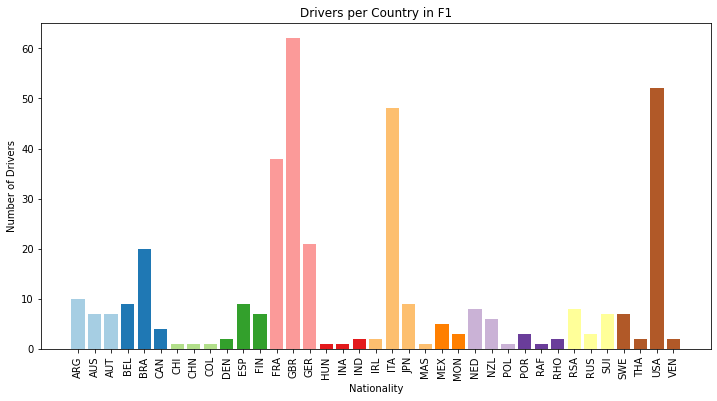

In [70]:
# Ajustar colores dinámicamente
colors = plt.cm.Paired(np.linspace(0, 1, len(drivers_per_country)))

# Crear la figura
plt.figure(figsize=(12, 6))

# Graficar barras
plt.bar(drivers_per_country.index, drivers_per_country.values, color=colors)

# Ajustes del gráfico
plt.xticks(rotation=90)  # Rotar etiquetas del eje X
plt.xlabel("Nationality")
plt.ylabel("Number of Drivers")
plt.title("Drivers per Country in F1")

# Mostrar el gráfico
plt.show()



ReviSamos los datos que contiene el DF
  Pos                Driver Nationality          Car   PTS  year Code
0   1         Nino  Farina          ITA   Alfa Romeo  30.0  1950  FAR
1   2  Juan Manuel  Fangio          ARG   Alfa Romeo  27.0  1950  FAN
2   3       Luigi  Fagioli          ITA   Alfa Romeo  24.0  1950  FAG
3   4         Louis Rosier          FRA  Talbot-Lago  13.0  1950  ROS
4   5      Alberto  Ascari          ITA      Ferrari  11.0  1950  ASC
Agrupamos los pilotos por año:
year
1950    22
1951    19
1952    22
1953    19
1954    26
        ..
2020    23
2021    21
2022    22
2023    22
2024    21
Name: Driver, Length: 75, dtype: int64


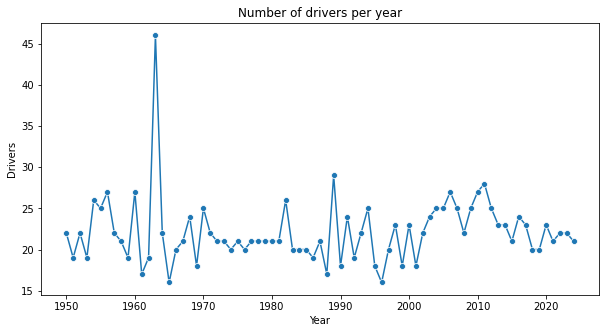

In [71]:
#Explorar los datos
print("ReviSamos los datos que contiene el DF")
print(drivers.head())

# Agrupar pilotos por año 
drivers_per_year = drivers.groupby("year")["Driver"].nunique()
print ("Agrupamos los pilotos por año:")
print(drivers_per_year)

#Crear gráfico:
plt.figure(figsize=(10,5))
sns.lineplot(x = drivers_per_year.index, y = drivers_per_year.values, marker = "o")
plt.xlabel("Year")
plt.ylabel("Drivers")
plt.title("Number of drivers per year")

plt.show()


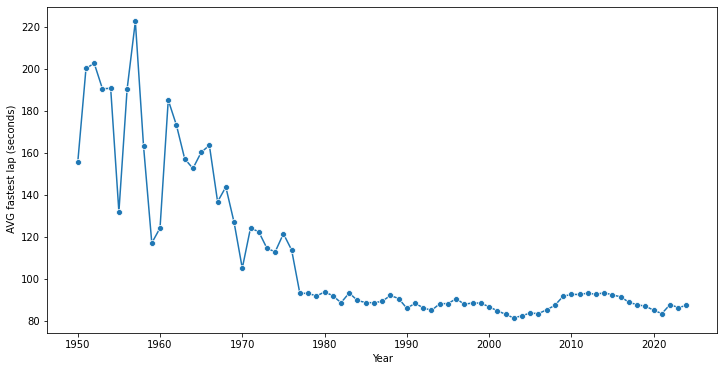

In [72]:
fastest_laps = fastest_laps.dropna(subset=["Time"])
fastest_laps["Time"] = "00:" + fastest_laps["Time"]  # Asegurar formato hh:mm:ss.sss
fastest_laps["Time"] = pd.to_timedelta(fastest_laps["Time"], errors="coerce")
fastest_laps["Time"] = fastest_laps["Time"].dt.total_seconds()

fastest_laps_per_year = fastest_laps.groupby('year')["Time"].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x = fastest_laps_per_year.index, y= fastest_laps_per_year.values, marker = "o")
plt.xlabel("Year")
plt.ylabel(" AVG fastest lap (seconds)")
plt.show()









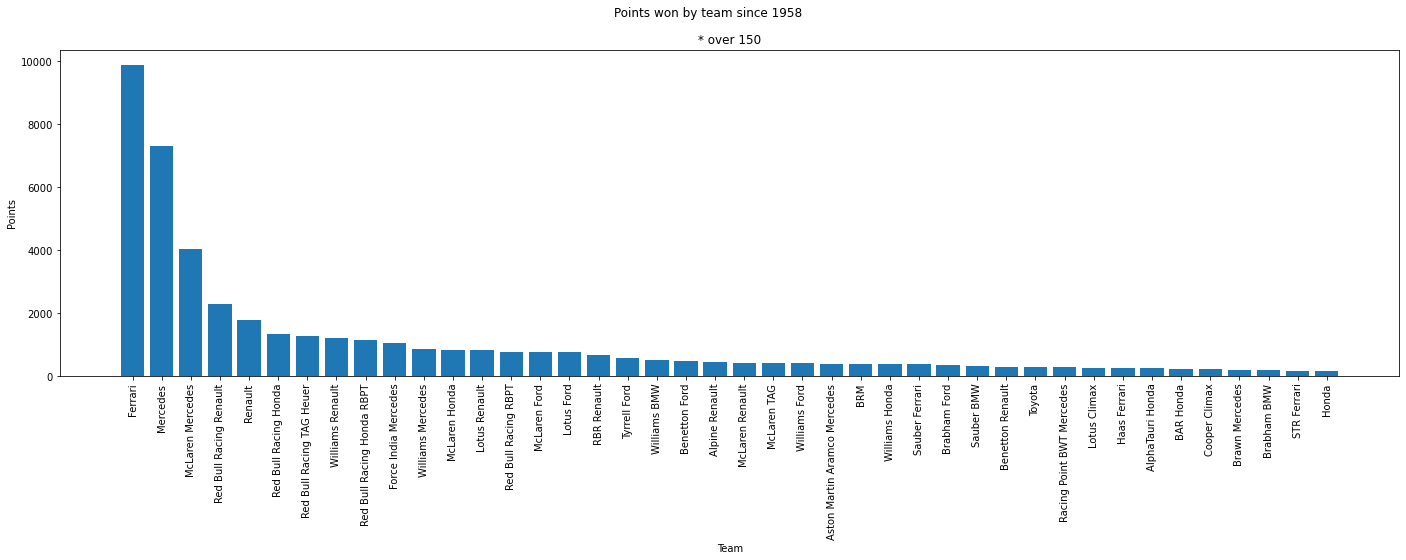

In [73]:
teams_points_year = teams.groupby('Team')["PTS"].sum()
teams_points_year = teams_points_year[teams_points_year > 150]
teams_points_year = teams_points_year.sort_values(ascending=False)


plt.figure(figsize= (24, 6))
plt.bar(x = teams_points_year.index, height = teams_points_year.values)
plt.xticks(rotation=90)
plt.suptitle("Points won by team since 1958")
plt.title("* over 150")
plt.xlabel("Team")
plt.ylabel("Points")
plt.show()

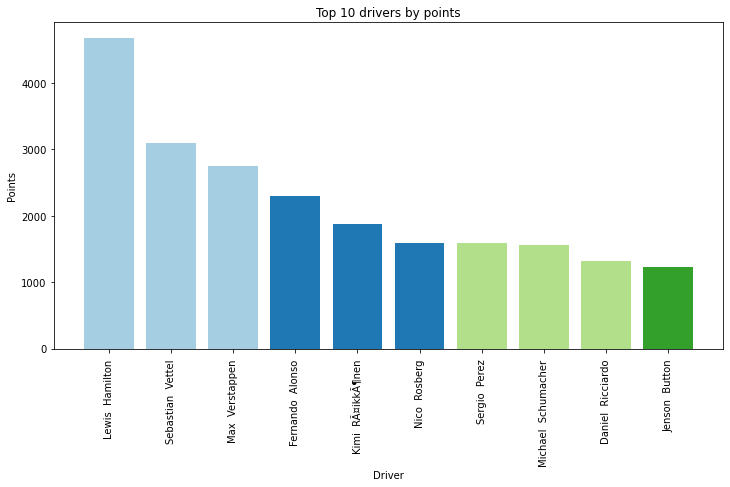

In [74]:
drivers.head()

drivers_points = drivers.groupby("Driver")["PTS"].sum()
drivers_points = drivers_points.sort_values(ascending = False).head(10)


plt.figure(figsize= (12, 6))
plt.bar(x = drivers_points.index, height = drivers_points.values, color = colors)
plt.xticks(rotation=90)
plt.title("Top 10 drivers by points")
plt.xlabel("Driver")
plt.ylabel("Points")
plt.show()
